<a href="https://colab.research.google.com/github/nishu-mns/ML-Labs/blob/main/ML_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch

In [2]:
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70], 
                   [73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69,96, 70], 
                   [73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96,70]], dtype='float32')

targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119], 
                    [56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119], 
                    [56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119]], dtype='float32')

inputs2 = inputs.copy()
targets2 = targets.copy()

In [3]:
import torch.nn as nn
from torch.autograd import Variable

In [4]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [5]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)
        
    def forward(self, x):
        out = self.linear(x)
        return out

In [6]:
# alpha = 0.1
alpha = 1e-7
model = linearRegression(inputs.size()[1], targets.size()[1])
# epochs = min(100, inputs.size()[0])
epochs = 1000

criterion = torch.nn.MSELoss(reduction="mean")
optimizer = torch.optim.SGD(model.parameters(), lr=alpha)

loss_values = []
epoch_values = [(i + 1) for i in range(epochs)]

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss_values.append(loss.detach().numpy())
    if epoch == 0 or epoch == epochs - 1:
        print(loss)
    loss.backward()
    optimizer.step()

print(list(model.parameters()))

tensor(2725.8247, grad_fn=<MseLossBackward0>)
tensor(733.6802, grad_fn=<MseLossBackward0>)
[Parameter containing:
tensor([[0.4030, 0.1605, 0.4880],
        [0.4526, 0.1771, 0.6104]], requires_grad=True), Parameter containing:
tensor([-0.2132,  0.2848], requires_grad=True)]


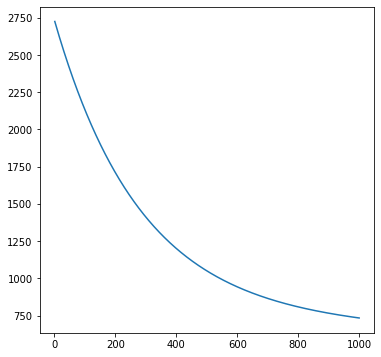

In [7]:
# Plotting a graph of number of epochs vs loss
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.plot(epoch_values, loss_values)
plt.show()

In [8]:
predicted = model(Variable(inputs)).data.numpy()
predicted = Variable(torch.from_numpy(predicted))
for i in range(len(predicted)):
    print(predicted[i], targets[i], abs(predicted[i] - targets[i]))

tensor([60.9432, 71.4336]) tensor([56., 70.]) tensor([4.9432, 1.4336])
tensor([81.8157, 96.1167]) tensor([ 81., 101.]) tensor([0.8157, 4.8833])
tensor([84.6563, 98.7894]) tensor([119., 133.]) tensor([34.3437, 34.2106])
tensor([65.8519, 76.6461]) tensor([22., 37.]) tensor([43.8519, 39.6461])
tensor([77.1609, 91.2390]) tensor([103., 119.]) tensor([25.8391, 27.7610])
tensor([60.9432, 71.4336]) tensor([56., 70.]) tensor([4.9432, 1.4336])
tensor([81.8157, 96.1167]) tensor([ 81., 101.]) tensor([0.8157, 4.8833])
tensor([84.6563, 98.7894]) tensor([119., 133.]) tensor([34.3437, 34.2106])
tensor([65.8519, 76.6461]) tensor([22., 37.]) tensor([43.8519, 39.6461])
tensor([77.1609, 91.2390]) tensor([103., 119.]) tensor([25.8391, 27.7610])
tensor([60.9432, 71.4336]) tensor([56., 70.]) tensor([4.9432, 1.4336])
tensor([81.8157, 96.1167]) tensor([ 81., 101.]) tensor([0.8157, 4.8833])
tensor([84.6563, 98.7894]) tensor([119., 133.]) tensor([34.3437, 34.2106])
tensor([65.8519, 76.6461]) tensor([22., 37.]) t

In [9]:
# Predict crop yield for apples if temp = 70, rain = 34, and humidity = 45
input = torch.from_numpy(np.array([70, 34, 45], dtype="float32"))
print(model(Variable(input)).data.numpy())

[55.41521 65.45319]


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [11]:
X_train, X_test, y_train, y_test = train_test_split(inputs2, targets2, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions, y_test

(array([[ 57.998405,  69.85993 ],
        [118.705215, 133.02066 ],
        [ 57.998405,  69.85993 ]], dtype=float32), array([[ 56.,  70.],
        [119., 133.],
        [ 56.,  70.]], dtype=float32))

In [12]:
mean_squared_error(predictions, y_test)

1.3523021